# Overlay plots

Here we plot the major base frequency for different time points.

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

In [170]:
# Interesting positions
def plot_positions():
    positions=[316,1670,1785,2340,5935,7172,8449,9165]
    for x in positions:
        plt.axvline(x=x, linewidth=1, linestyle=':')

In [171]:
# Control runs, replicate A
DD3_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD3A_1_sequence.txt.assembled.fastq_mapped.csv")
DD6_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD6A_1_sequence.txt.assembled.fastq_mapped.csv")
DD9_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD9A_1_sequence.txt.assembled.fastq_mapped.csv")
DD12_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD12A_1_sequence.txt.assembled.fastq_mapped.csv")
DD24_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD24A_1_sequence.txt.assembled.fastq_mapped.csv")
DD51_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD51A_1_sequence.txt.assembled.fastq_mapped.csv")

In [172]:
DD3_A.describe()

,Unnamed: 0,As,Cs,Gs,Ns,Ts,coverage,majorbases,position,secondbase,indels,qAs,qCs,qGs,qNs,qTs
count,10807.000000,10807.000000,10807.000000,10807.000000,10807.000000,10807.000000,10807.000000,10807.000000,10807.000000,10807.000000,10807.0,10807.000000,10807.000000,10807.000000,10807.0,10807.000000
mean,5403.000000,11299.397243,9240.678819,12376.406773,0.658092,8785.181364,41702.322291,41517.451189,5403.000000,129.244379,0.0,3.650977,3.394751,4.174169,0.0,2.973955
std,3119.856514,20350.779172,19023.057686,21358.336850,0.899012,18437.375934,17154.159493,17079.720762,3119.856514,121.902565,0.0,5.528818,5.762851,6.161381,0.0,4.989614
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
25%,2701.500000,22.000000,26.000000,27.000000,0.000000,20.000000,29410.500000,29279.000000,2701.500000,64.000000,0.0,0.358839,0.452419,0.491572,0.0,0.293292
50%,5403.000000,55.000000,46.000000,51.000000,0.000000,73.000000,38820.000000,38661.000000,5403.000000,108.000000,0.0,0.759302,0.734745,0.849290,0.0,0.697536
75%,8104.500000,21912.000000,113.000000,25257.500000,1.000000,287.000000,52799.500000,52598.500000,8104.500000,171.000000,0.0,5.756053,1.624548,7.672840,0.0,1.877887
max,10806.000000,100951.000000,100779.000000,100270.000000,7.000000,101080.000000,101307.000000,101080.000000,10806.000000,8778.000000,0.0,40.729093,56.036607,48.016484,0.0,34.429965


In [173]:
DD3_A['majorbase_ratio'] = DD3_A ['majorbases']/DD3_A ['coverage']
DD6_A['majorbase_ratio'] = DD6_A ['majorbases']/DD6_A ['coverage']
DD9_A['majorbase_ratio'] = DD9_A ['majorbases']/DD9_A ['coverage']
DD12_A['majorbase_ratio'] = DD12_A ['majorbases']/DD12_A ['coverage']
DD24_A['majorbase_ratio'] = DD24_A ['majorbases']/DD24_A ['coverage']
DD51_A['majorbase_ratio'] = DD51_A ['majorbases']/DD51_A ['coverage']
overlay_table =  pd.DataFrame ({'position':DD3_A['position'], 'DD3_A':DD3_A ['majorbase_ratio'], 'DD6_A':DD6_A ['majorbase_ratio'],'DD9_A':DD9_A ['majorbase_ratio'],'DD12_A':DD12_A ['majorbase_ratio'], 'DD24_A':DD24_A ['majorbase_ratio'], 'DD51_A':DD51_A ['majorbase_ratio']})
siz = len(DD3_A ['coverage'])
sample = siz*["DD3A"]+siz*["DD6A"]+siz*["DD9A"]+siz*["DD12A"]+siz*["DD24A"]+siz*["DD51A"]

overlay_table_concat = pd.DataFrame ({'position':pd.concat([DD3_A['position'],DD6_A['position'],DD9_A['position'],DD12_A['position'],DD24_A['position'],DD51_A['position']]), 'majorbase_ratio':pd.concat([DD3_A ['majorbase_ratio'],DD6_A ['majorbase_ratio'], DD9_A ['majorbase_ratio'],DD12_A ['majorbase_ratio'], DD24_A ['majorbase_ratio'], DD51_A ['majorbase_ratio'] ]), 'sample':sample})



In [174]:
sns.set_palette("hls")
sns.set_context("poster")

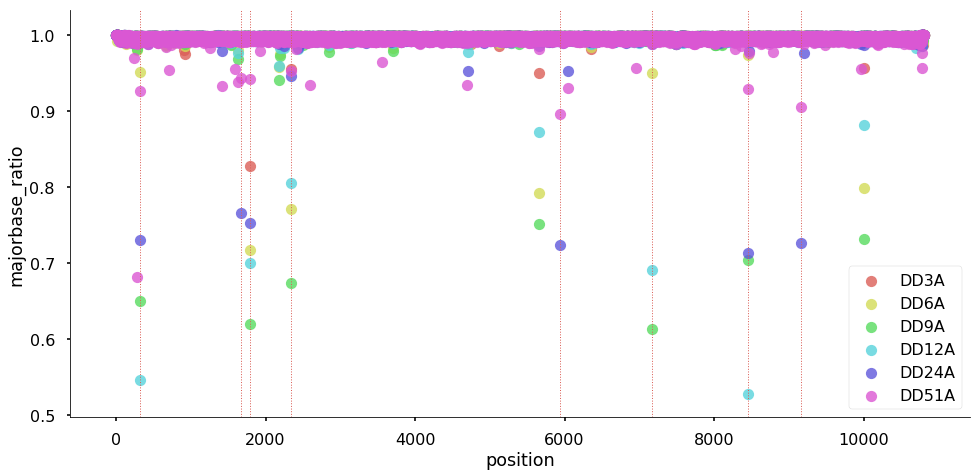

In [175]:

sns.lmplot( x="position", y="majorbase_ratio", data=overlay_table_concat, fit_reg=False, hue='sample', legend=False, size=7, aspect=2)
plt.legend(loc='lower right')
plot_positions()

## Same thing, without sample at 51 days

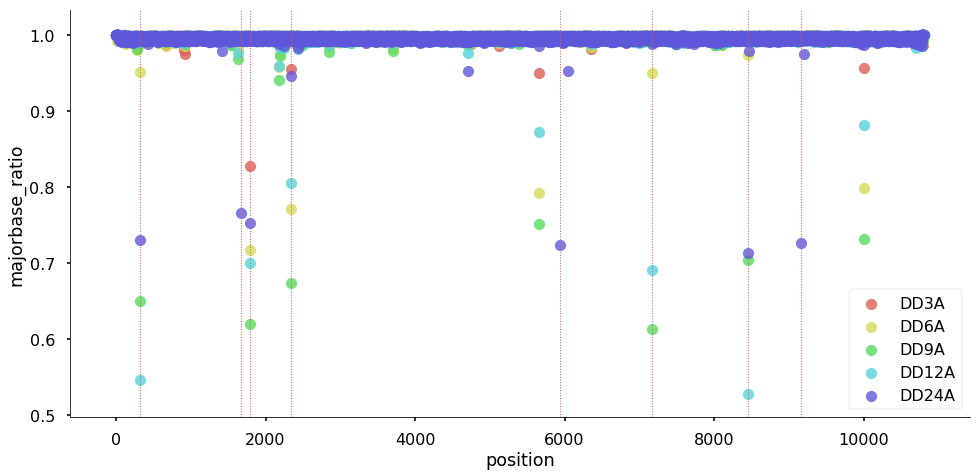

In [176]:
overlay_table_concat_no51 = overlay_table_concat.loc[overlay_table_concat['sample']!= "DD51A"]
sns.lmplot( x="position", y="majorbase_ratio", data= overlay_table_concat_no51, fit_reg=False, hue='sample', legend=False, size=7, aspect=2)
plt.legend(loc='lower right')
plot_positions()

## Same thing, Sample D

In [177]:
# Control runs, replicate D
DD3_D = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD3D_1_sequence.txt.assembled.fastq_mapped.csv")
DD6_D = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD6D_1_sequence.txt.assembled.fastq_mapped.csv")
DD9_D = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD9D_1_sequence.txt.assembled.fastq_mapped.csv")
DD12_D = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD12D_1_sequence.txt.assembled.fastq_mapped.csv")
DD24_D = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD24D_1_sequence.txt.assembled.fastq_mapped.csv")

In [178]:
DD3_D['majorbase_ratio'] = DD3_D ['majorbases']/DD3_D ['coverage']
DD6_D['majorbase_ratio'] = DD6_D ['majorbases']/DD6_D ['coverage']
DD9_D['majorbase_ratio'] = DD9_D ['majorbases']/DD9_D ['coverage']
DD12_D['majorbase_ratio'] = DD12_D ['majorbases']/DD12_D ['coverage']
DD24_D['majorbase_ratio'] = DD24_D ['majorbases']/DD24_D ['coverage']
overlay_table =  pd.DataFrame ({'position':DD3_D['position'], 'DD3_D':DD3_D ['majorbase_ratio'], 'DD6_D':DD6_D ['majorbase_ratio'],'DD9_D':DD9_D ['majorbase_ratio'],'DD12_D':DD12_D ['majorbase_ratio'],'DD24_D':DD24_D ['majorbase_ratio']})
siz = len(DD3_D ['coverage'])
sample = siz*["DD3D"]+siz*["DD6D"]+siz*["DD9D"]+siz*["DD12D"]+siz*["DD51D"]

overlay_table_concat = pd.DataFrame ({'position':pd.concat([DD3_D['position'],DD6_D['position'],DD9_D['position'],DD12_D['position'],DD24_D['position']]), 'majorbase_ratio':pd.concat([DD3_D ['majorbase_ratio'],DD6_D ['majorbase_ratio'], DD9_D ['majorbase_ratio'],DD12_D ['majorbase_ratio'], DD24_D ['majorbase_ratio'] ]), 'sample':sample})



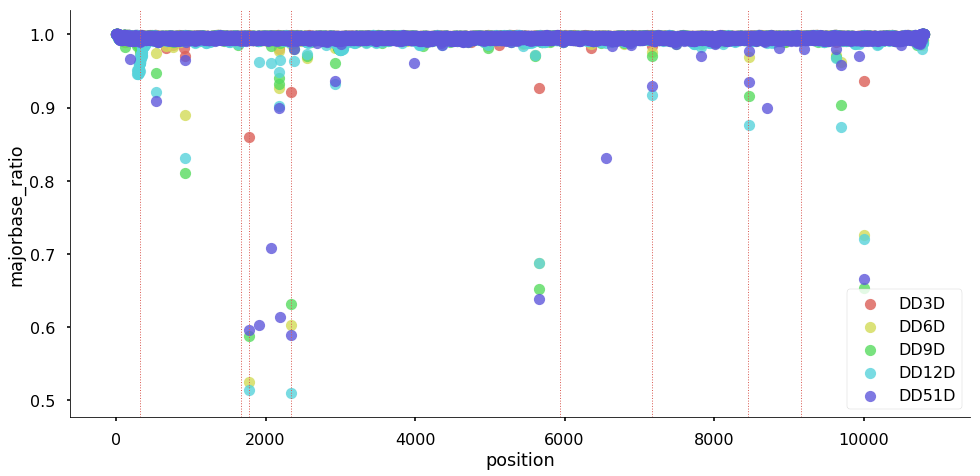

In [179]:
sns.lmplot( x="position", y="majorbase_ratio", data=overlay_table_concat, fit_reg=False, hue='sample', legend=False, size=7, aspect=2)
plt.legend(loc='lower right')
plot_positions()

## Same thing, sample E

In [180]:
# Control runs, replicate E
DD6_E = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD6E_1_sequence.txt.assembled.fastq_mapped.csv")
DD9_E = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD9E_1_sequence.txt.assembled.fastq_mapped.csv")


In [181]:
DD6_E['majorbase_ratio'] = DD6_E ['majorbases']/DD6_E ['coverage']
DD9_E['majorbase_ratio'] = DD9_E ['majorbases']/DD9_E ['coverage']
overlay_table =  pd.DataFrame ({'position':DD6_E['position'], 'DD6_E':DD6_E ['majorbase_ratio'], 'DD9_E':DD9_E ['majorbase_ratio']})
siz = len(DD6_E ['coverage'])
sample = siz*["DD6E"]+siz*["DD9E"]

overlay_table_concat = pd.DataFrame ({'position':pd.concat([DD6_E['position'],DD9_E['position']]), 'majorbase_ratio':pd.concat([DD6_E ['majorbase_ratio'],DD9_E ['majorbase_ratio']]), 'sample':sample})


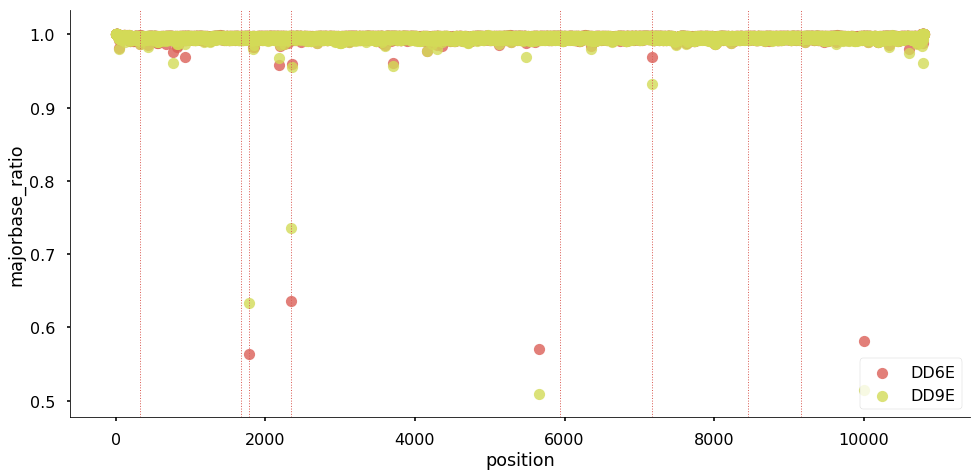

In [182]:
sns.lmplot( x="position", y="majorbase_ratio", data=overlay_table_concat, fit_reg=False, hue='sample', legend=False, size=7, aspect=2)
plt.legend(loc='lower right')
plot_positions()

## Same thing, TLR3 activation

In [183]:
# TLR3 activation runs, replicate A
TD9_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1TD9A_1_sequence.txt.assembled.fastq_mapped.csv")
TD12_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1TD12A_1_sequence.txt.assembled.fastq_mapped.csv")
TD24_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1TD24A_1_sequence.txt.assembled.fastq_mapped.csv")
TD51_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1TD51A_1_sequence.txt.assembled.fastq_mapped.csv")

In [184]:
TD9_A['majorbase_ratio'] = TD9_A ['majorbases']/TD9_A ['coverage']
TD12_A['majorbase_ratio'] = TD12_A ['majorbases']/TD12_A ['coverage']
TD24_A['majorbase_ratio'] = TD24_A ['majorbases']/TD24_A ['coverage']
TD51_A['majorbase_ratio'] = TD51_A ['majorbases']/TD51_A ['coverage']
overlay_table =  pd.DataFrame ({'position':TD9_A['position'], 'TD9_A':TD9_A ['majorbase_ratio'], 'TD12_A':TD12_A ['majorbase_ratio'],'TD24_A':TD24_A ['majorbase_ratio'], 'TD51_A':TD51_A ['majorbase_ratio']})
siz = len(TD9_A ['coverage'])
sample = siz*["TD9A"]+siz*["TD12A"]+siz*["TD24A"]+siz*["TD51A"]

overlay_table_concat = pd.DataFrame ({'position':pd.concat([TD9_A['position'],TD12_A['position'],TD24_A['position'],TD51_A['position']]), 'majorbase_ratio':pd.concat([TD9_A['majorbase_ratio'],TD12_A['majorbase_ratio'],TD24_A['majorbase_ratio'],TD51_A['majorbase_ratio'] ]), 'sample':sample})



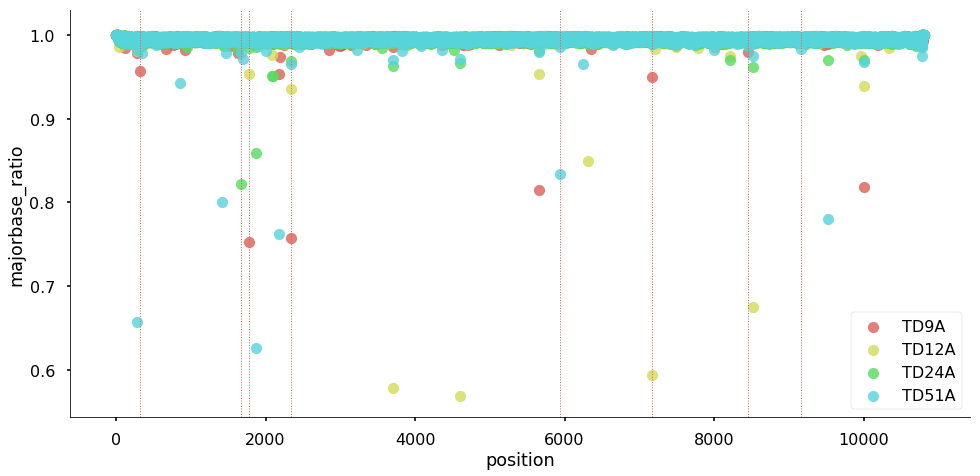

In [185]:
sns.lmplot( x="position", y="majorbase_ratio", data=overlay_table_concat, fit_reg=False, hue='sample', legend=False, size=7, aspect=2)
plt.legend(loc='lower right')
plot_positions()

# Overlay of coverages

In [186]:
# construction of the data table
siz = len(DD3_A ['coverage'])
sample = siz*["DD3A"]+siz*["DD6A"]+siz*["DD9A"]+siz*["DD12A"]+siz*["DD24A"]+siz*["DD51A"]
overlay_table_concat_DDA = pd.DataFrame ({'position':pd.concat([DD3_A['position'],DD6_A['position'],DD9_A['position'],DD12_A['position'],DD24_A['position'],DD51_A['position']]), 'coverage':pd.concat([DD3_A ['coverage'],DD6_A ['coverage'], DD9_A ['coverage'],DD12_A ['coverage'], DD24_A ['coverage'], DD51_A ['coverage'] ]), 'sample':sample})

siz = len(DD3_D ['coverage'])
sample = siz*["DD3D"]+siz*["DD6D"]+siz*["DD9D"]+siz*["DD12D"]+siz*["DD51D"]
overlay_table_concat_DDD = pd.DataFrame ({'position':pd.concat([DD3_D['position'],DD6_D['position'],DD9_D['position'],DD12_D['position'],DD24_D['position']]), 'coverage':pd.concat([DD3_D ['coverage'],DD6_D ['coverage'], DD9_D ['coverage'],DD12_D ['coverage'], DD24_D ['coverage'] ]), 'sample':sample})

siz = len(DD6_E ['coverage'])
sample = siz*["DD6E"]+siz*["DD9E"]
overlay_table_concat_DDE = pd.DataFrame ({'position':pd.concat([DD6_E['position'],DD9_E['position']]), 'majorbase_ratio':pd.concat([DD6_E ['coverage'],DD9_E ['coverage']]), 'sample':sample})

siz = len(TD9_A ['coverage'])
sample = siz*["TD9A"]+siz*["TD12A"]+siz*["TD24A"]+siz*["TD51A"]
overlay_table_concat_TD = pd.DataFrame ({'position':pd.concat([TD9_A['position'],TD12_A['position'],TD24_A['position'],TD51_A['position']]), 'coverage':pd.concat([TD9_A['coverage'],TD12_A['coverage'],TD24_A['coverage'],TD51_A['coverage'] ]), 'sample':sample})

overlay_table_concat=pd.concat([overlay_table_concat_DDA,overlay_table_concat_DDD, overlay_table_concat_DDE, overlay_table_concat_TD])

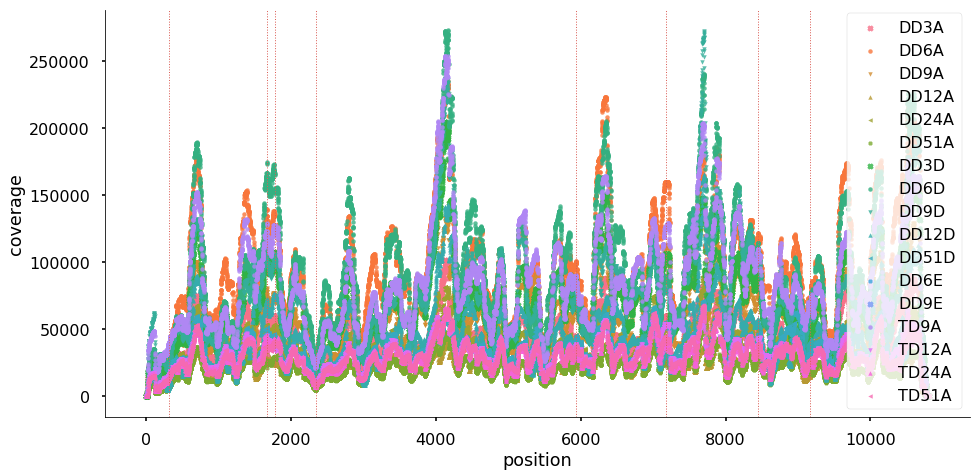

In [187]:
markers = ['x','o','v','^','<', '+', 'x','o','v','^','<', '+', 'x','o','v','^','<']
sns.lmplot( x="position", y="coverage", data=overlay_table_concat, fit_reg=False, hue='sample', legend=False, size=7, aspect=2, lowess=True, markers=markers, scatter_kws={"s": 20})
plt.legend(loc='lower right')
plot_positions()

# Overlays per time point

## Time point 3

In [188]:
# construction of the data table
siz = len(DD3_A ['coverage'])
sample = len(DD3_A ['coverage'])*["DD3A"]+len(DD3_D ['coverage'])*["DD3D"]
overlay_table_concat_DD3 = pd.DataFrame ({'position':pd.concat([DD3_A['position'],DD3_D['position']]), 'majorbase_ratio':pd.concat([DD3_A ['majorbase_ratio'],DD3_D ['majorbase_ratio']]), 'sample':sample})


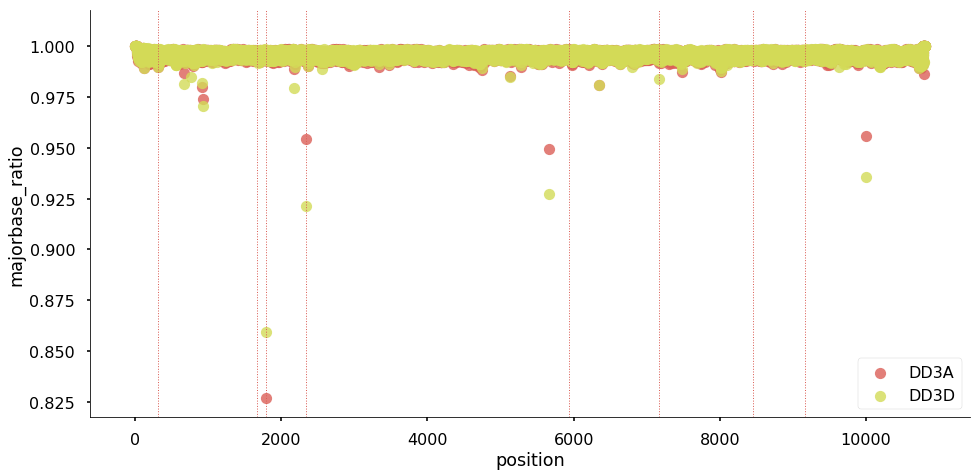

In [189]:
sns.lmplot( x="position", y="majorbase_ratio", data=overlay_table_concat_DD3, fit_reg=False, hue='sample', legend=False, size=7, aspect=2, lowess=True)
plt.legend(loc='lower right')
plot_positions()

## Time point 6

In [190]:
# construction of the data table
siz = len(DD6_A ['coverage'])
sample = len(DD6_A ['coverage'])*["DD6A"]+len(DD6_D ['coverage'])*["DD6D"]+len(DD6_E ['coverage'])*["DD6E"]
overlay_table_concat_DD6 = pd.DataFrame ({'position':pd.concat([DD6_A['position'],DD6_D['position'],DD6_E['position']]), 'majorbase_ratio':pd.concat([DD6_A ['majorbase_ratio'],DD6_D ['majorbase_ratio'],DD6_E ['majorbase_ratio']]), 'sample':sample})


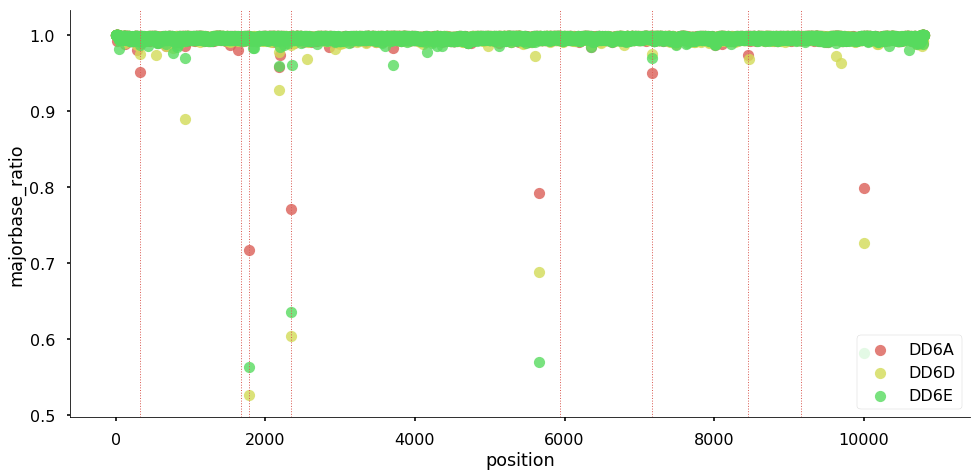

In [191]:
sns.lmplot( x="position", y="majorbase_ratio", data=overlay_table_concat_DD6, fit_reg=False, hue='sample', legend=False, size=7, aspect=2, lowess=True)
plt.legend(loc='lower right')
plot_positions()

## Time point 9

In [192]:
# construction of the data table
siz = len(DD9_A ['coverage'])
sample = len(DD9_A ['coverage'])*["DD9A"]+len(DD9_D ['coverage'])*["DD9D"]+len(DD9_E ['coverage'])*["DD9E"]
overlay_table_concat_DD9 = pd.DataFrame ({'position':pd.concat([DD9_A['position'],DD9_D['position'],DD9_E['position']]), 'majorbase_ratio':pd.concat([DD9_A ['majorbase_ratio'],DD9_D ['majorbase_ratio'],DD9_E ['majorbase_ratio']]), 'sample':sample})


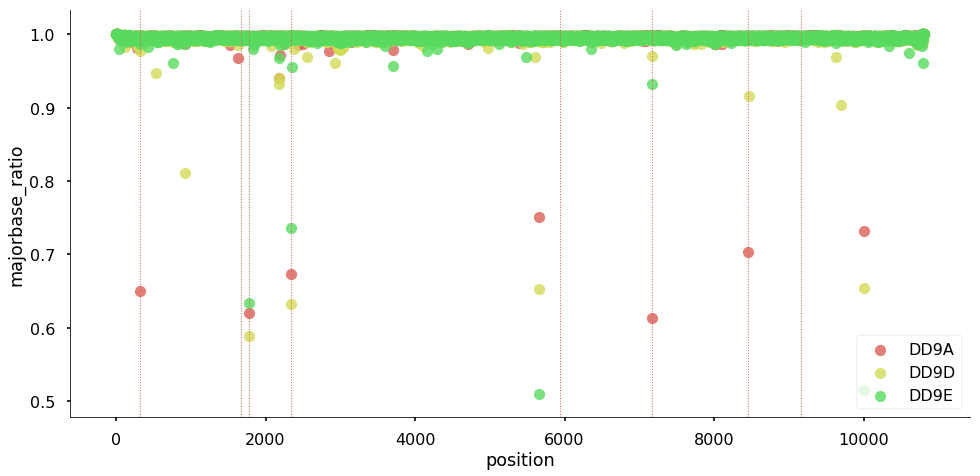

In [193]:
sns.lmplot( x="position", y="majorbase_ratio", data=overlay_table_concat_DD9, fit_reg=False, hue='sample', legend=False, size=7, aspect=2, lowess=True)
plt.legend(loc='lower right')
plot_positions()

## Time point 12

In [194]:
# construction of the data table
siz = len(DD12_A ['coverage'])
sample = len(DD12_A ['coverage'])*["DD12A"]+len(DD12_D ['coverage'])*["DD12D"]
overlay_table_concat_DD12 = pd.DataFrame ({'position':pd.concat([DD12_A['position'],DD12_D['position']]), 'majorbase_ratio':pd.concat([DD12_A ['majorbase_ratio'],DD12_D ['majorbase_ratio']]), 'sample':sample})


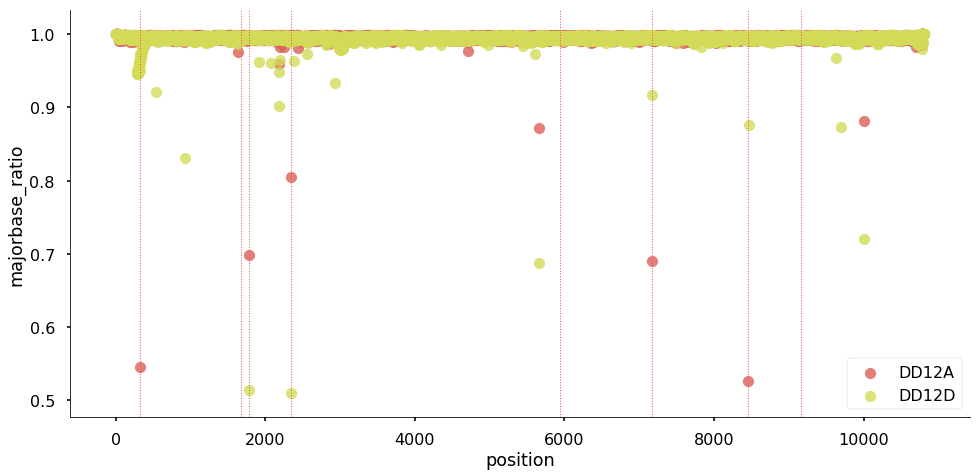

In [195]:
sns.lmplot( x="position", y="majorbase_ratio", data=overlay_table_concat_DD12, fit_reg=False, hue='sample', legend=False, size=7, aspect=2, lowess=True)
plt.legend(loc='lower right')
plot_positions()

## Time point 24

In [196]:
# construction of the data table
siz = len(DD24_A ['coverage'])
sample = len(DD24_A ['coverage'])*["DD24A"]+len(DD24_D ['coverage'])*["DD24D"]
overlay_table_concat_DD24 = pd.DataFrame ({'position':pd.concat([DD24_A['position'],DD24_D['position']]), 'majorbase_ratio':pd.concat([DD24_A ['majorbase_ratio'],DD24_D ['majorbase_ratio']]), 'sample':sample})


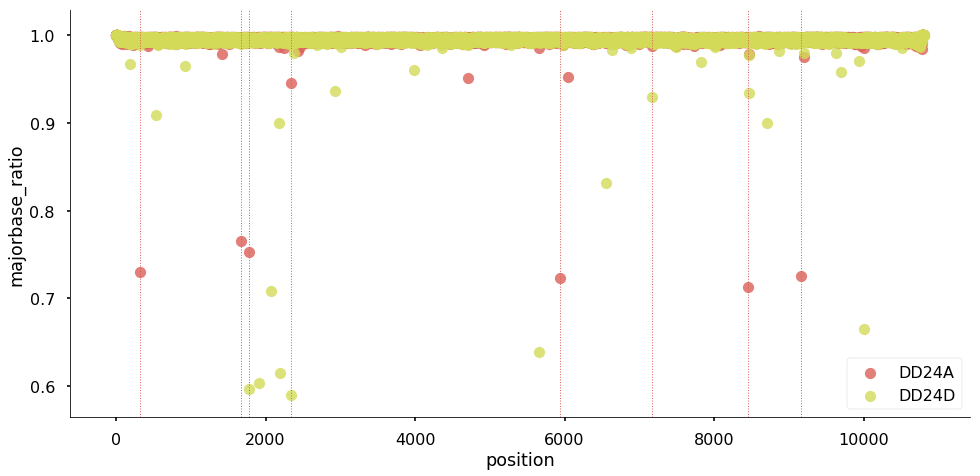

In [197]:
sns.lmplot( x="position", y="majorbase_ratio", data=overlay_table_concat_DD24, fit_reg=False, hue='sample', legend=False, size=7, aspect=2, lowess=True)
plt.legend(loc='lower right')
plot_positions()